## Preprocessing (old dataset)


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from PIL import Image
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from skimage.feature import hog
import torch
from torchvision import models,transforms
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


In [ ]:
# old dataset

local_directory = '/content/drive/MyDrive/UTKFace'
filenames = [f for f in os.listdir(local_directory) if os.path.isfile(os.path.join(local_directory, f))]

np.random.seed(None)
np.random.shuffle(filenames)

image_path, age_labels, gender_labels,race_labels = [], [], [], []

for filename in filenames:
    full_path = os.path.join(local_directory, filename)
    image_path.append(full_path)

    temp = filename.split('_')

    if len(temp) >= 3:
        age_labels.append(temp[0])
        gender_labels.append(temp[1])
        race_labels.append(temp[2])
    else:
        print(f"Skipping file with unexpected format: {filename}")


In [ ]:

df = pd.DataFrame()
df['image'], df['age'], df['gender'],df['race'] = image_path, age_labels, gender_labels, race_labels


In [ ]:

unique_ages = df['age'].unique()
unique_ages.sort()
unique_genders = df['gender'].unique()
unique_races = df['race'].unique()

print("Unique ages:", unique_ages)
print("Unique genders:", unique_genders)
print("Unique races:", unique_races)


In [ ]:

#remove outliers
df = df[df['race'].isin(['0','1','2','3','4'])]
df['race'].value_counts()


In [ ]:

unique_races = df['race'].unique()

print("Unique races:", unique_races)


In [ ]:
df.head()

In [ ]:

gender_dict = {0:"Male",1:"Female"}
race_dict = {0:"White",1:"Black",2:"Asian",3:"Indian",4:"Others"}


In [ ]:
df.dtypes

In [ ]:

df['gender'] = df['gender'].astype('int32')
df['age'] = df['age'].astype('int32')
df['race'] = df['race'].astype('int32')


In [ ]:
df.dtypes

,0
image,object
age,int32
gender,int32
race,int32


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50',
          '51-60', '61-70', '71-80', '81-90', '91-100', '101-110', '111-120']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

age_counts = df['age_group'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution by Age Groups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
sns.displot(df.age)

# Preprocessing (new dataset)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# for each age, just leave 500 picture
import shutil
import os
import random

def process_images_by_age(df, input_dir, output_dir):

  if not os.path.exists(output_dir):
    os.makedirs(output_dir)

  for age in df['age'].unique():
    age_df = df[df['age'] == age]
    if len(age_df) > 500:
      images_to_remove = random.sample(age_df['image'].tolist(), len(age_df) - 500)

      for image_path in images_to_remove:
        try:
          filename = os.path.basename(image_path)
          output_path = os.path.join(output_dir, filename)
          shutil.copy(image_path, output_path)
          os.remove(image_path)
        except Exception as e:
          print(f"Error processing {image_path}: {e}")
    else:
      for image_path in age_df['image'].tolist():
        try:
          filename = os.path.basename(image_path)
          output_path = os.path.join(output_dir, filename)
          shutil.copy(image_path, output_path)
          os.remove(image_path)
        except Exception as e:
          print(f"Error processing {image_path}: {e}")

# Example usage:
input_directory = '/content/drive/MyDrive/UTKFace'  # Replace with your input directory
output_directory = '/content/drive/MyDrive/UTKFace_processed'  # Replace with your output directory
process_images_by_age(df, input_directory, output_directory)


In [ ]:
import shutil
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from PIL import Image
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from skimage.feature import hog
import torch
from torchvision import models,transforms
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
local_directory = '/content/drive/MyDrive/UTKFace_processed'
filenames = [f for f in os.listdir(local_directory) if os.path.isfile(os.path.join(local_directory, f))]

np.random.seed(None)
np.random.shuffle(filenames)

image_path, age_labels, gender_labels,race_labels = [], [], [], []

for filename in filenames:
    full_path = os.path.join(local_directory, filename)
    image_path.append(full_path)

    temp = filename.split('_')

    if len(temp) >= 3:
        age_labels.append(temp[0])
        gender_labels.append(temp[1])
        race_labels.append(temp[2])
    else:
        print(f"Skipping file with unexpected format: {filename}")

In [ ]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'],df['race'] = image_path, age_labels, gender_labels, race_labels

In [ ]:
unique_ages = df['age'].unique()
unique_ages.sort()
unique_genders = df['gender'].unique()
unique_genders.sort()
unique_races = df['race'].unique()
unique_races.sort()

print("Unique ages:", unique_ages)
print("Unique genders:", unique_genders)
print("Unique races:", unique_races)

Unique ages: ['1' '10' '100' '101' '103' '105' '11' '110' '111' '115' '116' '12' '13'
 '14' '15' '16' '17' '18' '19' '2' '20' '21' '22' '23' '24' '25' '26' '27'
 '28' '29' '3' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '4' '40'
 '41' '42' '43' '44' '45' '46' '47' '48' '49' '5' '50' '51' '52' '53' '54'
 '55' '56' '57' '58' '59' '6' '60' '61' '62' '63' '64' '65' '66' '67' '68'
 '69' '7' '70' '71' '72' '73' '74' '75' '76' '77' '78' '79' '8' '80' '81'
 '82' '83' '84' '85' '86' '87' '88' '89' '9' '90' '91' '92' '93' '95' '96'
 '99']
Unique genders: ['0' '1']
Unique races: ['0' '1' '2' '3' '4']


In [ ]:
gender_dict = {0:"Male",1:"Female"}
race_dict = {0:"White",1:"Black",2:"Asian",3:"Indian",4:"Others"}

In [ ]:
df.dtypes

,0
image,object
age,object
gender,object
race,object


In [ ]:
df['gender'] = df['gender'].astype('int32')
df['age'] = df['age'].astype('int32')
df['race'] = df['race'].astype('int32')

In [ ]:
df.dtypes

,0
image,object
age,int32
gender,int32
race,int32


In [ ]:
df.head()

,image,age,gender,race
0,/content/drive/MyDrive/UTKFace_processed/26_0_...,26,0,0
1,/content/drive/MyDrive/UTKFace_processed/44_0_...,44,0,4
2,/content/drive/MyDrive/UTKFace_processed/24_1_...,24,1,1
3,/content/drive/MyDrive/UTKFace_processed/13_1_...,13,1,0
4,/content/drive/MyDrive/UTKFace_processed/32_0_...,32,0,4


In [ ]:
df.shape

(19385, 4)

In [ ]:
for col in ['age', 'gender', 'race']:
  print(f"Value counts for {col}:")
  print(df[col].value_counts())
  print("\n")

Value counts for age:
age
28     500
25     500
29     500
27     500
26     500
      ... 
115      3
91       2
101      2
103      1
111      1
Name: count, Length: 104, dtype: int64


Value counts for gender:
gender
0    10322
1     9063
Name: count, dtype: int64


Value counts for race:
race
0    8898
1    3539
3    3071
2    2562
4    1315
Name: count, dtype: int64




In [ ]:
df.describe()

,age,gender,race
count,19385.000000,19385.000000,19385.00000
mean,35.447511,0.467526,1.19350
std,20.911053,0.498957,1.34091
min,1.000000,0.000000,0.00000
25%,22.000000,0.000000,0.00000
50%,32.000000,0.000000,1.00000
75%,50.000000,1.000000,2.00000
max,116.000000,1.000000,4.00000


<ipython-input-39-d309fb3f8ca9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


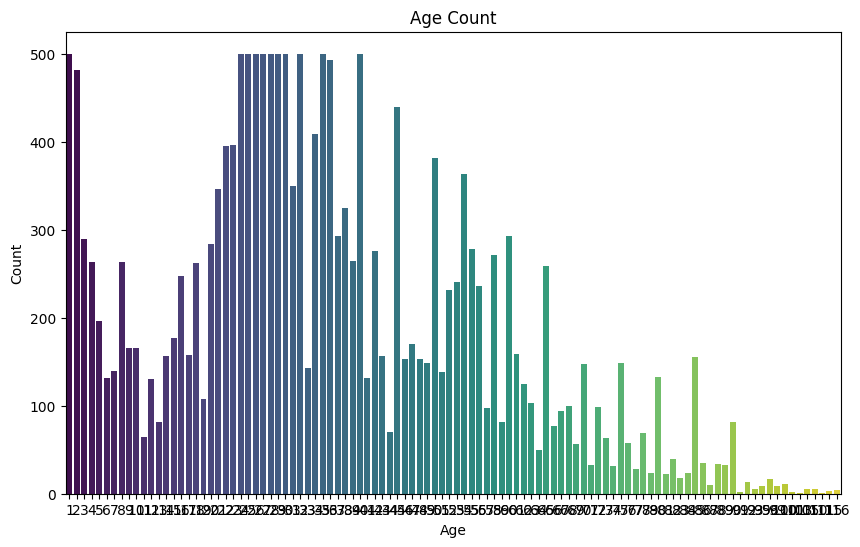

In [ ]:
counts = df.age.value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Count')
plt.show()

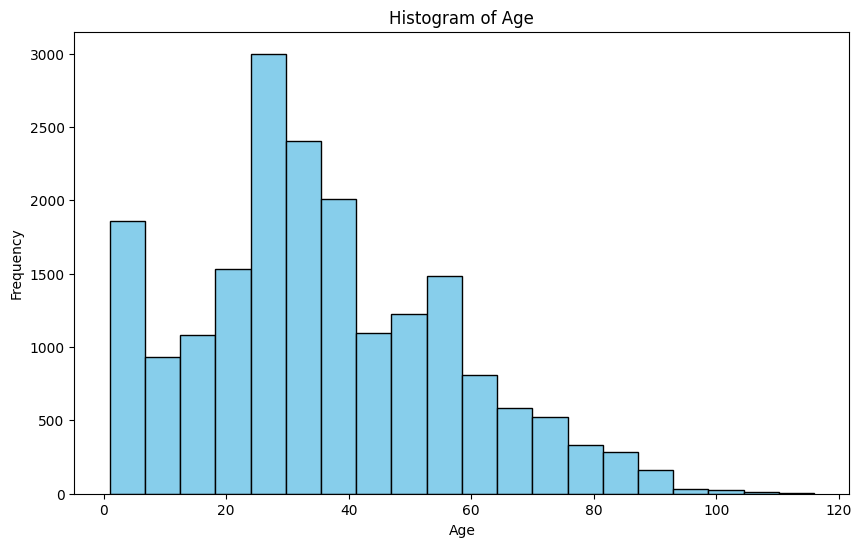

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'].astype(int), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

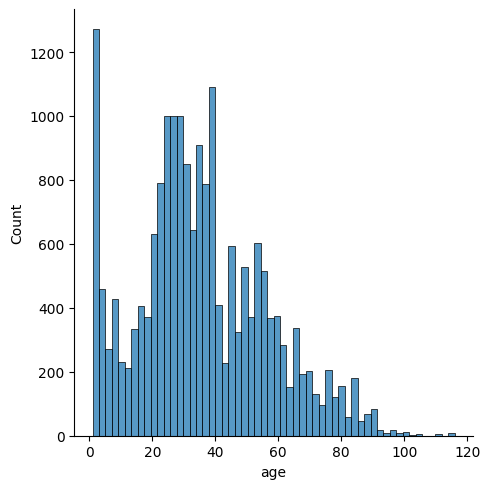

In [ ]:
sns.displot(df.age)

<ipython-input-23-0049dd33767f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')


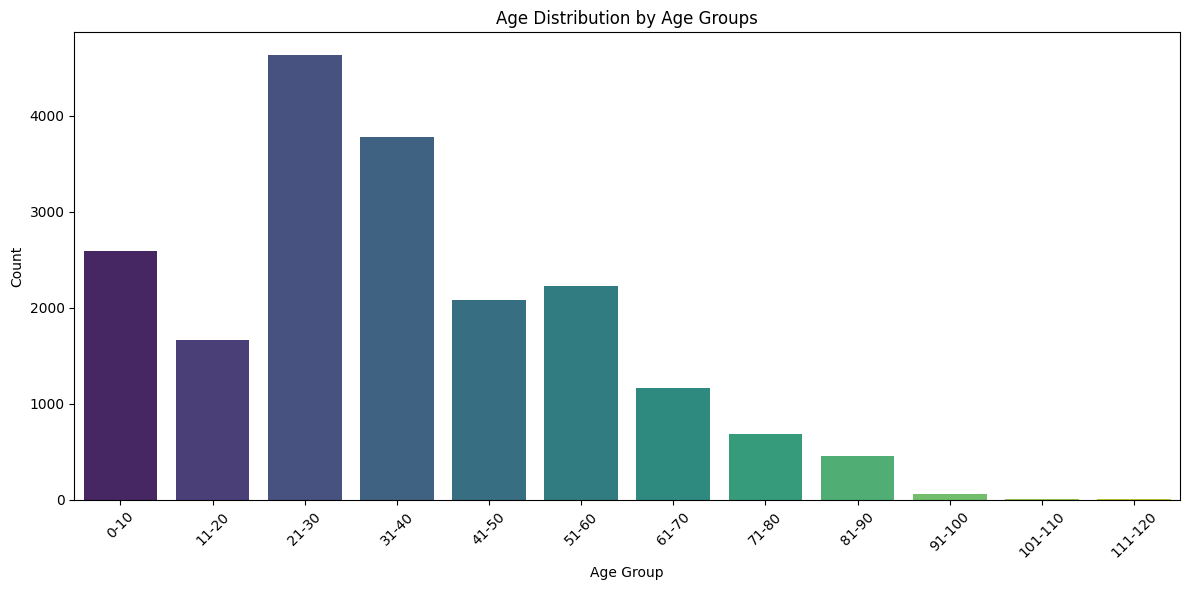

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50',
          '51-60', '61-70', '71-80', '81-90', '91-100', '101-110', '111-120']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

age_counts = df['age_group'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution by Age Groups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-24-7a71034b3f74>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


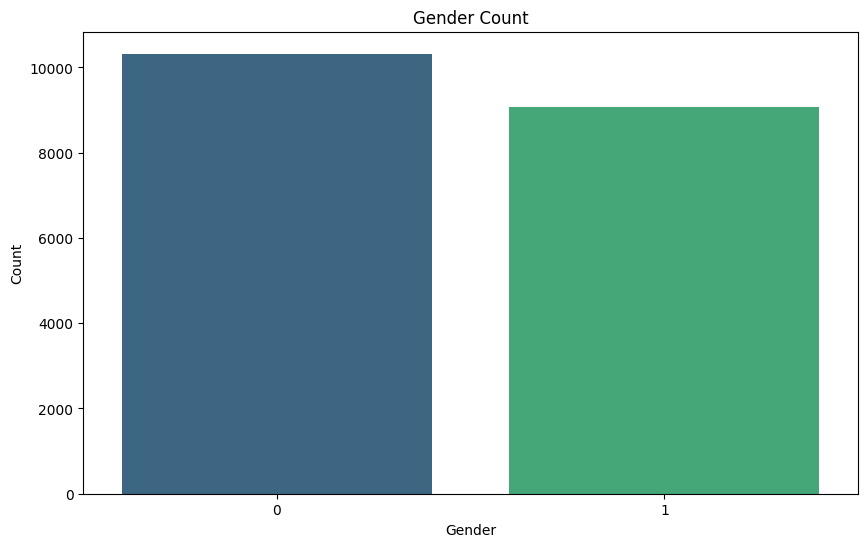

In [ ]:
counts = df.gender.value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count')
plt.show()

<ipython-input-25-7ed45e65f538>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


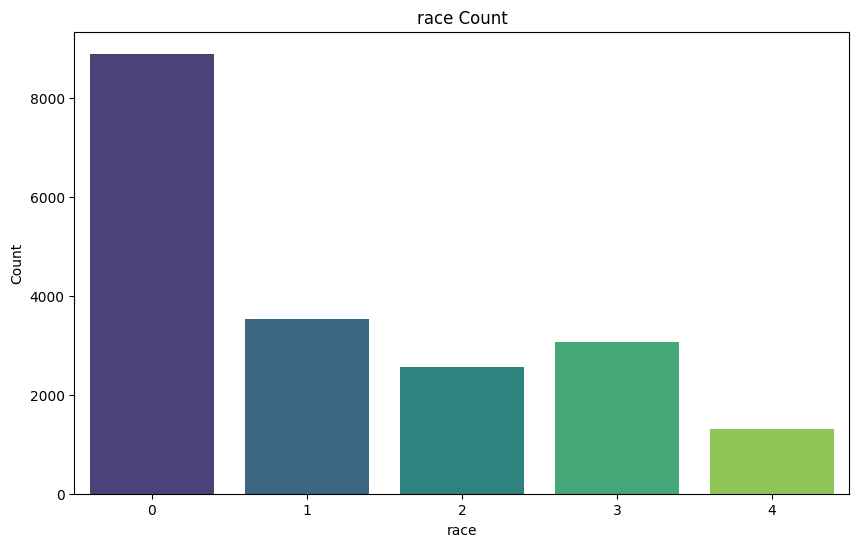

In [ ]:
counts = df.race.value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.xlabel('race')
plt.ylabel('Count')
plt.title('race Count')
plt.show()

In [ ]:
import os
import cv2
import torch
from PIL import Image
import numpy as np
from tqdm import tqdm
from facenet_pytorch import MTCNN
from torchvision import transforms

#Gamma
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

#clahe
def adjust_clahe(image, clip_limit=2.0, tile_grid_size=(8,8)):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return final

#face
def align_face(image, landmarks):
    try:
        if landmarks is None or len(landmarks) != 5:
            raise ValueError("Landmarks are not detected correctly.")

        left_eye = landmarks[0]
        right_eye = landmarks[1]

        left_eye_center = left_eye.mean(axis=0).astype("int")
        right_eye_center = right_eye.mean(axis=0).astype("int")

        dy = right_eye_center[1] - left_eye_center[1]
        dx = right_eye_center[0] - left_eye_center[0]
        angle = np.degrees(np.arctan2(dy, dx))

        eyes_center = ((left_eye_center[0] + right_eye_center[0]) // 2,
                       (left_eye_center[1] + right_eye_center[1]) // 2)
        M = cv2.getRotationMatrix2D(eyes_center, angle, scale=1.0)

        rotated = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]),
                                 flags=cv2.INTER_CUBIC)

        return rotated
    except Exception as e:
        print(f"Error in align_face: {e}")
        return image

def process_image(image_path, output_path, mtcnn, transform, gamma=1.2, use_clahe=False):
    img = cv2.imread(image_path)
    if img is None:
        print(f"can't read image: {image_path}")
        return

    if use_clahe:
        img = adjust_clahe(img)
    else:
        img = adjust_gamma(img, gamma)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(img_rgb)

    boxes, probs, landmarks = mtcnn.detect(pil_img, landmarks=True)

    if boxes is None or landmarks is None:
        print(f"don't detect the key point of face: {image_path}")
        return

    for idx, (box, landmark) in enumerate(zip(boxes, landmarks)):
        if landmark is None or len(landmark) != 5:
            print(f"image {image_path} 's {idx+1} th face's key point is not complete. ")
            continue

        aligned_img = align_face(img, landmark)

        aligned_rgb = cv2.cvtColor(aligned_img, cv2.COLOR_BGR2RGB)
        aligned_pil = Image.fromarray(aligned_rgb)
        boxes_aligned, probs_aligned, landmarks_aligned = mtcnn.detect(aligned_pil, landmarks=True)

        if boxes_aligned is None or landmarks_aligned is None:
            print(f"dont' detect the key point of face after align: {image_path},'s {idx+1} face。")
            continue

        box_aligned = boxes_aligned[0]
        x1, y1, x2, y2 = map(int, box_aligned)

        x1 = max(x1, 0)
        y1 = max(y1, 0)
        x2 = min(x2, aligned_img.shape[1])
        y2 = min(y2, aligned_img.shape[0])

        face_crop = aligned_img[y1:y2, x1:x2]

        if face_crop.size == 0:
            print(f"align face area is useless: {image_path}，'s {idx+1} face。")
            continue

        face_filename = os.path.splitext(os.path.basename(image_path))[0]
        face_extension = os.path.splitext(image_path)[1]
        face_output_path = os.path.join(output_path, f"{face_filename}_face{idx+1}{face_extension}")
        cv2.imwrite(face_output_path, face_crop)

def process_folder(input_folder, output_folder, gamma=1.2, use_clahe=False):

    os.makedirs(output_folder, exist_ok=True)

    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    mtcnn = MTCNN(keep_all=True, device=device, thresholds=[0.6, 0.7, 0.7])

    transform = transforms.Compose([
        transforms.ToTensor(),
    ])

    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff')
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(image_extensions)]

    if not image_files:
        print(f"no image in input folder: {input_folder}")
        return

    for image_file in tqdm(image_files, desc='Processing Images'):
        image_path = os.path.join(input_folder, image_file)
        process_image(image_path, output_folder, mtcnn, transform, gamma, use_clahe)

if __name__ == "__main__":
    input_folder = '/content/drive/MyDrive/UTKFace_processed'
    output_folder = '/content/drive/MyDrive/UTKFace_processed_1'

    gamma_value = 1.2
    use_clahe = True

    process_folder(input_folder, output_folder, gamma=gamma_value, use_clahe=use_clahe)

In [ ]:
train, test = train_test_split(df, train_size=0.8, random_state=42)

In [ ]:
x_train = []
for file in train.image:
    img_path = os.path.join(file)
    img = load_img(img_path).convert('RGB')
    img = img.resize((224, 224))
    img = np.array(img)
    x_train.append(img)

x_train = np.array(x_train)
x_train = x_train.reshape(len(x_train), 224, 224, 3)

In [ ]:
y_gender = np.array(train.gender)
y_age = np.array(train.age)
y_race = np.array(train.race)

y_race = to_categorical(y_race, num_classes=5)

## Pretrained model

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        print("GPU is available and configured for use.")
    except RuntimeError as e:
        print(e)
else:
    print("GPU is not available. Using CPU instead.")

base_model = ResNet50(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

output_gender = Dense(1, activation='sigmoid', name='gender')(x)
output_age = Dense(1, activation='linear', name='age')(x)
output_race = Dense(5, activation='softmax', name='race')(x)

model = Model(inputs=base_model.input, outputs=[output_gender, output_age, output_race])

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam',
              loss={'gender': 'binary_crossentropy', 'age': 'mse', 'race': 'categorical_crossentropy'},
              metrics={'gender': 'accuracy', 'age': 'mae', 'race': 'accuracy'})

model.fit(x_train, {'gender': y_gender, 'age': y_age, 'race': y_race}, epochs=10, batch_size=32)

x_test = []
for file in test.image:
    img = load_img(file).convert('RGB')
    img = img.resize((224, 224))
    img = np.array(img)
    x_test.append(img)

x_test = np.array(x_test)
x_test = x_test.reshape(len(x_test), 224, 224, 3)

predictions = model.predict(x_test)

predicted_gender = predictions[0]
predicted_age = predictions[1]
predicted_race = predictions[2]

GPU is available and configured for use.
Epoch 1/10
593/593 [==============================] - 52s 82ms/step - loss: 191.1896 - gender_loss: 0.5485 - age_loss: 189.3616 - race_loss: 1.2794 - gender_accuracy: 0.7232 - age_mae: 10.4326 - race_accuracy: 0.5058
Epoch 2/10
593/593 [==============================] - 46s 78ms/step - loss: 152.2817 - gender_loss: 0.4724 - age_loss: 150.6769 - race_loss: 1.1324 - gender_accuracy: 0.7749 - age_mae: 9.2280 - race_accuracy: 0.5697
Epoch 3/10
593/593 [==============================] - 45s 76ms/step - loss: 137.1473 - gender_loss: 0.4468 - age_loss: 135.6251 - race_loss: 1.0753 - gender_accuracy: 0.7898 - age_mae: 8.7320 - race_accuracy: 0.6001
Epoch 4/10
593/593 [==============================] - 43s 72ms/step - loss: 129.8331 - gender_loss: 0.4196 - age_loss: 128.3925 - race_loss: 1.0210 - gender_accuracy: 0.8071 - age_mae: 8.4702 - race_accuracy: 0.6212
Epoch 5/10
593/593 [==============================] - 42s 71ms/step - loss: 123.2422 - gender_

In [ ]:
image_index = 2
test_image = x_test[image_index]

predictions = model.predict(np.expand_dims(test_image, axis=0))

predicted_gender = predictions[0][0][0]
predicted_age = predictions[1][0][0]
predicted_race = predictions[2][0]

predicted_gender_label = "Female" if predicted_gender > 0.5 else "Male"
predicted_race_label = np.argmax(predicted_race)

print("Predicted Gender:", predicted_gender_label)
print("Predicted Age:", predicted_age)
print("Predicted Race:", predicted_race_label)
print(race_dict[predicted_race_label])


1/1 [==============================] - 0s 209ms/step
Predicted Gender: Male
Predicted Age: 36.77849
Predicted Race: 0
White


## SVM

In [ ]:
def extract_features(image_paths):
    features = []
    for path in image_paths:
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            continue
        image = cv2.resize(image, (64, 64))
        feature = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
        features.append(feature)
    return np.array(features)

X = extract_features(image_path)

y_age = np.array(age_labels)
y_race = np.array(race_labels)

X_train, X_test, y_age_train, y_age_test = train_test_split(X, y_age, test_size=0.2, random_state=42)

X_train_race, X_test_race, y_race_train, y_race_test = train_test_split(X, y_race, test_size=0.2, random_state=42)

print("Training SVM model for age prediction...")
svm_model_age = svm.SVC(kernel='rbf', C=1, gamma='scale')
svm_model_age.fit(X_train, y_age_train)
svm_age_predictions = svm_model_age.predict(X_test)

print("Training SVM model for race prediction...")
svm_model_race = svm.SVC(kernel='rbf', C=1, gamma='scale')
svm_model_race.fit(X_train_race, y_race_train)
svm_race_predictions = svm_model_race.predict(X_test_race)

print("SVM Model Results for Age Prediction:")
print(classification_report(y_age_test, svm_age_predictions))
print("Accuracy:", accuracy_score(y_age_test, svm_age_predictions))

print("SVM Model Results for Race Prediction:")
print(classification_report(y_race_test, svm_race_predictions))
print("Accuracy:", accuracy_score(y_race_test, svm_race_predictions))

Training SVM model for age prediction...
Training SVM model for race prediction...
SVM Model Results for Age Prediction:
              precision    recall  f1-score   support

           1       0.45      0.92      0.61       212
           2       0.38      0.03      0.05       103
           3       0.50      0.02      0.03        58
           4       0.33      0.04      0.06        57
           5       0.00      0.00      0.00        37
           6       0.00      0.00      0.00        23
           7       0.00      0.00      0.00        25
           8       0.16      0.09      0.12        53
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00        24
          13       0.00      0.00      0.00        13
          14       0.00      0.00      0.00        33
          15       0.00      0.00      0.00        35
          16  

c:\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\Python310\lib\site-packages\sklearn\metrics\_

## Random Forest

In [ ]:
print("Training Random Forest model for age prediction...")
rf_model_age = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_age.fit(X_train, y_age_train)
rf_age_predictions = rf_model_age.predict(X_test)

print("Training Random Forest model for race prediction...")
rf_model_race = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_race.fit(X_train_race, y_race_train)
rf_race_predictions = rf_model_race.predict(X_test_race)

print("Random Forest Model Results for Age Prediction:")
print(classification_report(y_age_test, rf_age_predictions))
print("Accuracy:", accuracy_score(y_age_test, rf_age_predictions))

print("Random Forest Model Results for Race Prediction:")
print(classification_report(y_race_test, rf_race_predictions))
print("Accuracy:", accuracy_score(y_race_test, rf_race_predictions))

Training Random Forest model for age prediction...
Training Random Forest model for race prediction...
Random Forest Model Results for Age Prediction:
              precision    recall  f1-score   support

           1       0.30      0.86      0.45       212
           2       0.17      0.04      0.06       103
           3       0.00      0.00      0.00        58
           4       1.00      0.02      0.03        57
           5       0.00      0.00      0.00        37
           6       0.00      0.00      0.00        23
           7       0.00      0.00      0.00        25
           8       0.25      0.02      0.04        53
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00        24
          13       0.00      0.00      0.00        13
          14       0.00      0.00      0.00        33
          15       0.00      0.00     

c:\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\Python310\lib\site-packages\sklearn\metrics\_

# PART1
## CNN Model Construction Demo

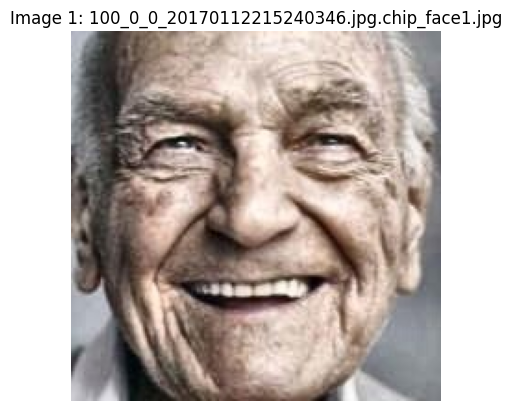

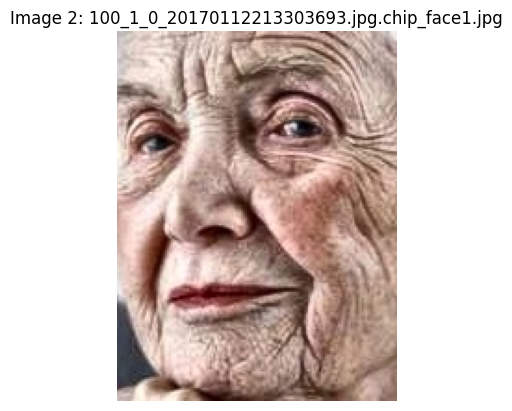

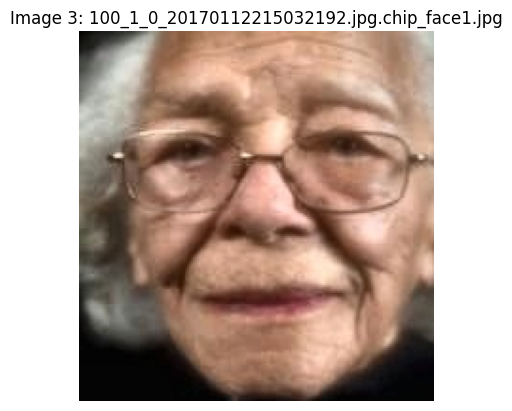

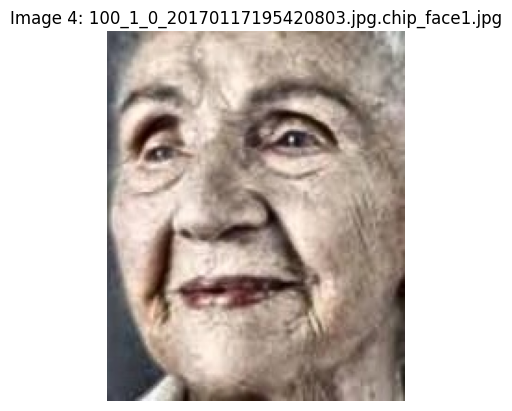

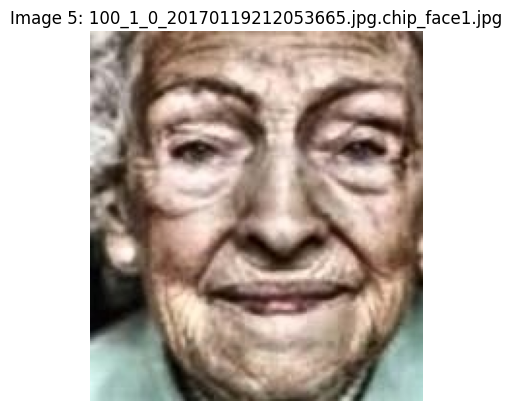

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Folder containing the images
folder = "UTKFace_processed_2"
files = [f for f in os.listdir(folder) if f.endswith('.jpg') or f.endswith('.chip.jpg')]

# Number of images to display
num_images_to_show = 5
for i, file in enumerate(files[:num_images_to_show]):
    # Read the image
    image_path = os.path.join(folder, file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format

    plt.figure()
    plt.imshow(image)
    plt.title(f"Image {i+1}: {file}")
    plt.axis('off')  # Hide axes
    plt.show()

In [ ]:
#Step 2: Image reading and information extraction
import cv2

ages, genders, races, images = [], [], [], []
for fle in files:
    parts = fle.split('_')
    if len(parts) >= 4:
        age = int(parts[0])
        gender = int(parts[1])
        race = int(parts[2])
        total = os.path.join(fldr, fle)
        image = cv2.imread(total)
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (48, 48))
            images.append(image)
            ages.append(age)
            genders.append(gender)
            races.append(race)

In [ ]:
#Step 3: Data conversion and storage
import numpy as np

images_f = np.array(images)
genders_f = np.array(genders)
ages_f = np.array(ages)
races_f = np.array(races)

np.save('image.npy', images_f)
np.save('gender.npy', genders_f)
np.save('age.npy', ages_f)
np.save('race.npy', races_f)

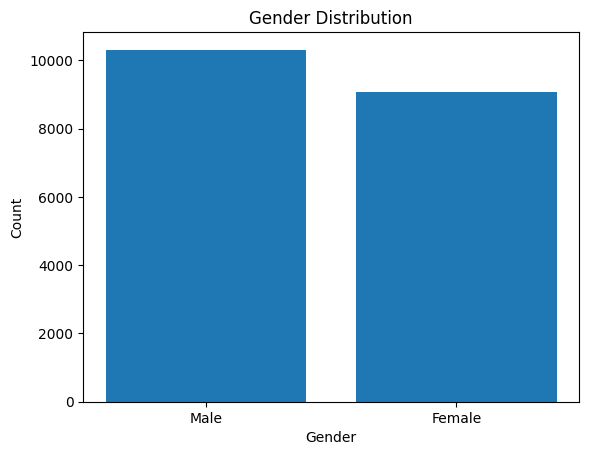

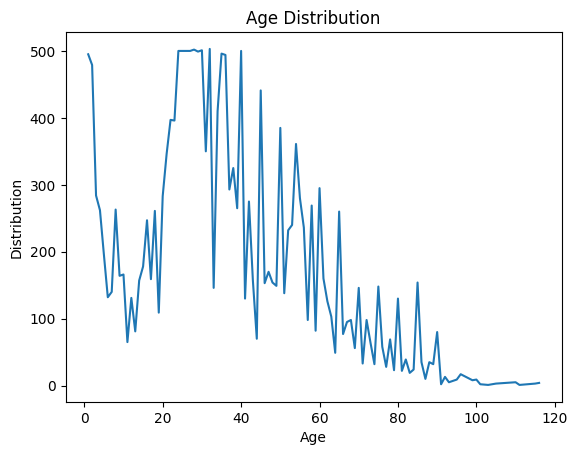

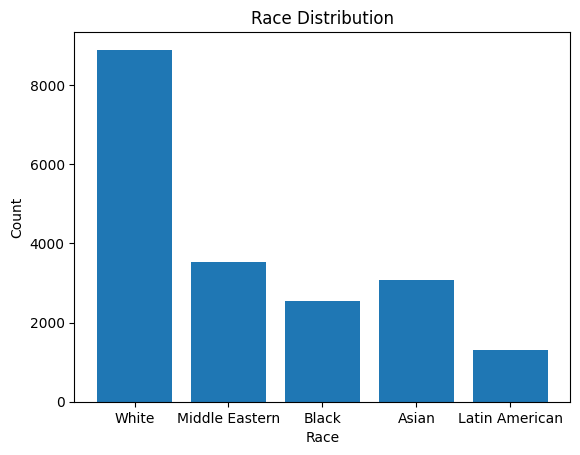

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Gender distribution
values, counts = np.unique(genders_f, return_counts=True)
plt.bar(['Male', 'Female'], counts)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

# Age distribution
values, counts = np.unique(ages_f, return_counts=True)
plt.plot(values, counts)
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Age Distribution')
plt.show()

# Race distribution
race_labels = ['White', 'Middle Eastern', 'Black', 'Asian', 'Latin American']
values, counts = np.unique(races_f, return_counts=True)
plt.bar(race_labels, counts)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Race Distribution')
plt.show()


In [ ]:
#Step 7: Data normalization and splitting
from sklearn.model_selection import train_test_split

images_f_2 = images_f / 255.0
labels = np.array([[age, gender, race] for age, gender, race in zip(ages, genders, races)])
X_train, X_test, Y_train, Y_test = train_test_split(images_f_2, labels, test_size=0.25)
Y_train_2 = [Y_train[:, 1], Y_train[:, 0], Y_train[:, 2]]
Y_test_2 = [Y_test[:, 1], Y_test[:, 0], Y_test[:, 2]]

In [ ]:
#Step 8-9: Build and train the CNN model
from tensorflow.keras.layers import Dropout, Flatten, Dense, MaxPooling2D, Conv2D, Input, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

def Convolution(input_tensor, filters):
    x = Conv2D(filters, (3, 3), padding='same')(input_tensor)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)
    return Dropout(0.25)(x)

def build_model(input_shape):
    inputs = Input(shape=input_shape)
    conv_1 = Convolution(inputs, 32)
    conv_2 = Convolution(conv_1, 64)
    conv_3 = Convolution(conv_2, 128)
    flatten = Flatten()(conv_3)

    dense = Dense(256, activation='relu')(flatten)
    dense = Dropout(0.5)(dense)

    gender_output = Dense(1, activation='sigmoid', name='gender_output')(dense)
    age_output = Dense(1, activation='relu', name='age_output')(dense)
    race_output = Dense(5, activation='softmax', name='race_output')(dense)

    model = Model(inputs=inputs, outputs=[gender_output, age_output, race_output])
    model.compile(optimizer='adam', loss=['binary_crossentropy', 'mse', 'sparse_categorical_crossentropy'])
    return model

model = build_model((48, 48, 3))
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)
early_stop = EarlyStopping(patience=10)

history = model.fit(
    X_train, Y_train_2,
    epochs=10, batch_size=64,
    validation_data=(X_test, Y_test_2),
    callbacks=[checkpoint, early_stop]
)

Epoch 1/10
228/228 [==============================] - 4s 10ms/step - loss: 472.6469 - gender_output_loss: 1.2152 - age_output_loss: 468.5043 - race_output_loss: 2.9272 - val_loss: 360.4611 - val_gender_output_loss: 0.6947 - val_age_output_loss: 358.2605 - val_race_output_loss: 1.5059
Epoch 2/10
228/228 [==============================] - 2s 8ms/step - loss: 316.7028 - gender_output_loss: 0.7620 - age_output_loss: 314.2709 - race_output_loss: 1.6699 - val_loss: 337.9047 - val_gender_output_loss: 0.6435 - val_age_output_loss: 335.9214 - val_race_output_loss: 1.3398
Epoch 3/10
228/228 [==============================] - 2s 8ms/step - loss: 236.1921 - gender_output_loss: 0.6596 - age_output_loss: 234.1334 - race_output_loss: 1.3991 - val_loss: 409.0699 - val_gender_output_loss: 0.6509 - val_age_output_loss: 407.0531 - val_race_output_loss: 1.3659
Epoch 4/10
228/228 [==============================] - 2s 8ms/step - loss: 217.3275 - gender_output_loss: 0.6483 - age_output_loss: 215.2962 - race_

In [ ]:
#Steps 10-12: Evaluate Model and Predictions
model.load_weights('best_model.keras')
eval_result = model.evaluate(X_test, Y_test_2)
print(eval_result)

# Predict a single image
def test_image(image_idx):
    img = np.expand_dims(X_test[image_idx], axis=0)
    gender, age, race = model.predict(img)
    gender = 'Male' if gender[0][0] > 0.5 else 'Female'
    race = np.argmax(race[0])
    print(f"Predicted - Age: {age[0][0]}, Gender: {gender}, Race: {race_labels[race]}")

test_image(5)

152/152 [==============================] - 0s 3ms/step - loss: 114.1251 - gender_output_loss: 0.6263 - age_output_loss: 112.2036 - race_output_loss: 1.2952
[114.1251449584961, 0.6262686848640442, 112.20361328125, 1.2952324151992798]
1/1 [==============================] - 0s 125ms/step
Predicted - Age: 0.8363990783691406, Gender: Male, Race: Black


1/1 [==============================] - 0s 18ms/step


C:\Users\b1439\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\b1439\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\b1439\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\b1439\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\b1439\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 206

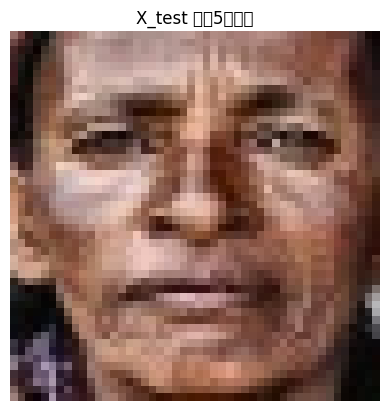

        Type        Age  Gender            Race
0     Actual  62.000000    Male  Middle Eastern
1  Predicted  55.814854  Female           White


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assume race_labels is defined
race_labels = ['White', 'Middle Eastern', 'Black', 'Asian', 'Latin American']

# Load model weights and make predictions
model.load_weights('best_model.keras')

# Select the 10th image and make a prediction
image_idx = 10
img = np.expand_dims(X_test[image_idx], axis=0)
predicted_gender, predicted_age, predicted_race_idx = model.predict(img)

# Process prediction results
predicted_gender = 'Male' if predicted_gender[0][0] > 0.5 else 'Female'
predicted_age = predicted_age[0][0]
predicted_race = race_labels[np.argmax(predicted_race_idx[0])]

# Retrieve actual labels
actual_age = Y_test[image_idx][0]
actual_gender = 'Male' if Y_test[image_idx][1] == 1 else 'Female'
actual_race = race_labels[Y_test[image_idx][2]]

# Display the image
plt.imshow(X_test[image_idx])
plt.title("5th Image in X_test")
plt.axis('off')
plt.show()

# Create a comparison table
data = {
    "Type": ["Actual", "Predicted"],
    "Age": [actual_age, predicted_age],
    "Gender": [actual_gender, predicted_gender],
    "Race": [actual_race, predicted_race]
}

# Display the comparison table
df = pd.DataFrame(data)
print(df)

1/1 [==============================] - 0s 12ms/step


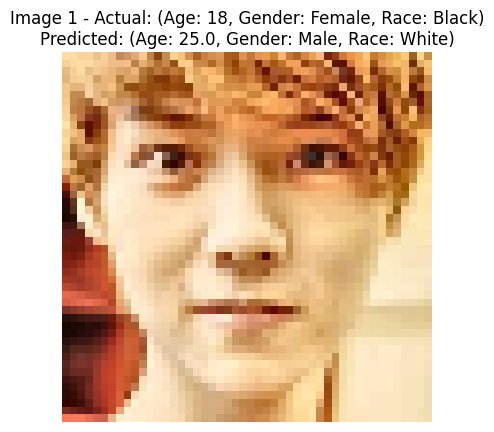

1/1 [==============================] - 0s 13ms/step


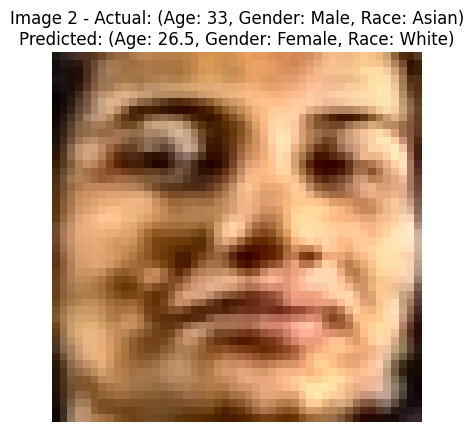

1/1 [==============================] - 0s 12ms/step


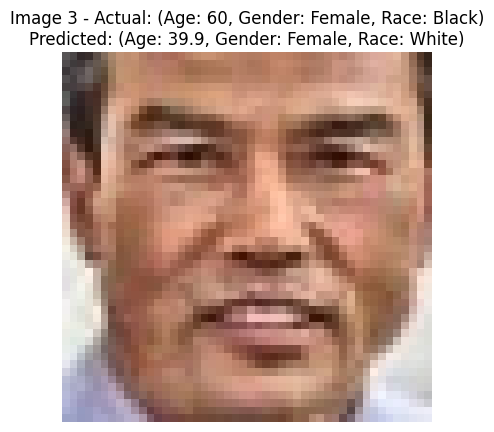

1/1 [==============================] - 0s 13ms/step


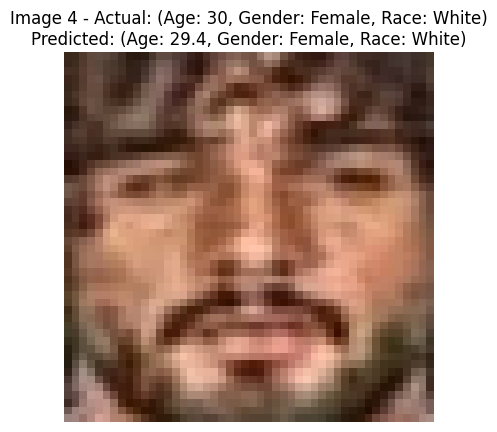

1/1 [==============================] - 0s 14ms/step


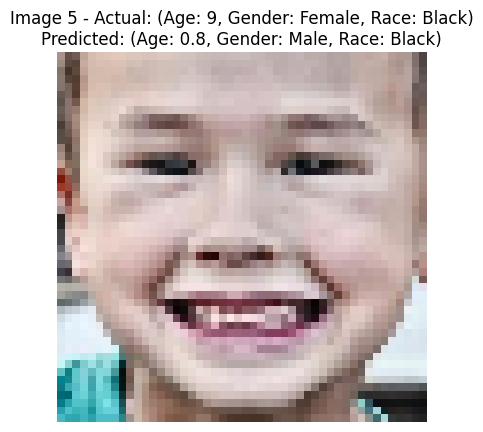

1/1 [==============================] - 0s 15ms/step


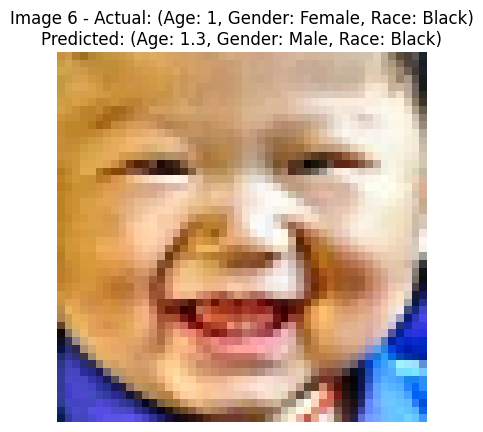

1/1 [==============================] - 0s 15ms/step


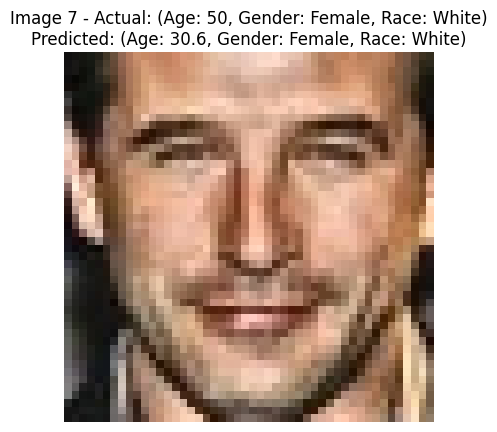

1/1 [==============================] - 0s 14ms/step


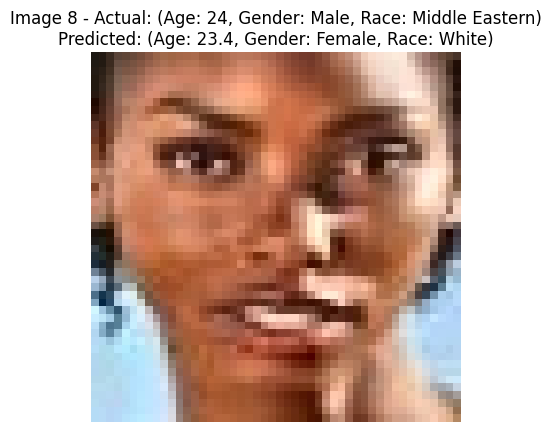

1/1 [==============================] - 0s 14ms/step


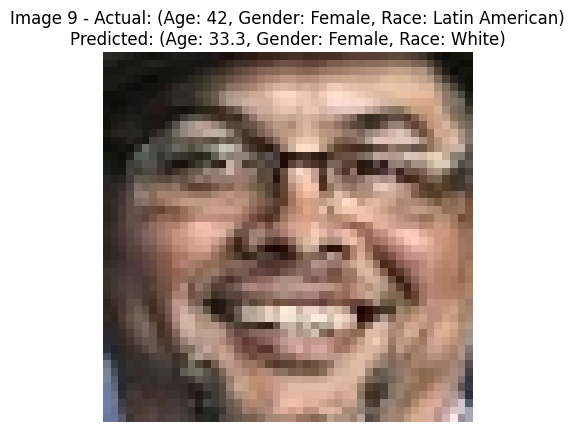

1/1 [==============================] - 0s 15ms/step


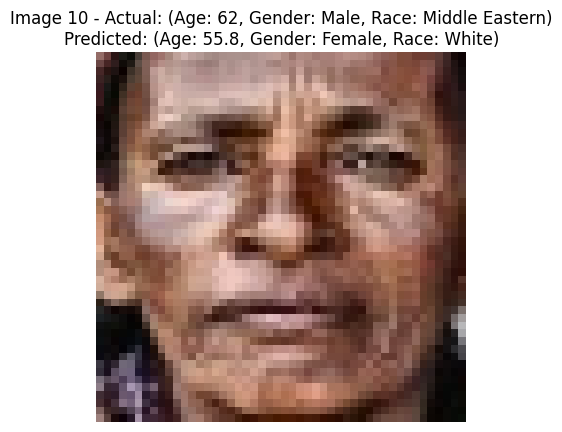

   Image Index  Actual Age  Predicted Age Actual Gender Predicted Gender  \
0            1          18      24.975960        Female             Male   
1            2          33      26.512329          Male           Female   
2            3          60      39.874233        Female           Female   
3            4          30      29.390938        Female           Female   
4            5           9       0.836399        Female             Male   
5            6           1       1.255720        Female             Male   
6            7          50      30.556845        Female           Female   
7            8          24      23.382803          Male           Female   
8            9          42      33.317741        Female           Female   
9           10          62      55.814854          Male           Female   

      Actual Race Predicted Race  
0           Black          White  
1           Asian          White  
2           Black          White  
3           White      

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assume race_labels is defined
race_labels = ['White', 'Middle Eastern', 'Black', 'Asian', 'Latin American']

# Load model weights
model.load_weights('best_model.keras')

# Define the range of image indices to predict
image_indices = range(1, 11)

# Lists to store actual and predicted values
actual_age_list = []
actual_gender_list = []
actual_race_list = []
predicted_age_list = []
predicted_gender_list = []
predicted_race_list = []

# Predict and store results for each image
for image_idx in image_indices:
    # Get the image and predict
    img = np.expand_dims(X_test[image_idx], axis=0)
    predicted_gender, predicted_age, predicted_race_idx = model.predict(img)

    # Process prediction values
    pred_gender = 'Male' if predicted_gender[0][0] > 0.5 else 'Female'
    pred_age = predicted_age[0][0]
    pred_race = race_labels[np.argmax(predicted_race_idx[0])]

    # Retrieve actual labels
    actual_age = Y_test[image_idx][0]
    actual_gender = 'Male' if Y_test[image_idx][1] == 1 else 'Female'
    actual_race = race_labels[Y_test[image_idx][2]]

    # Store results
    actual_age_list.append(actual_age)
    actual_gender_list.append(actual_gender)
    actual_race_list.append(actual_race)
    predicted_age_list.append(pred_age)
    predicted_gender_list.append(pred_gender)
    predicted_race_list.append(pred_race)

    # Display image with labels
    plt.figure()
    plt.imshow(X_test[image_idx])
    plt.title(f"Image {image_idx} - Actual: (Age: {actual_age}, Gender: {actual_gender}, Race: {actual_race})\n"
              f"Predicted: (Age: {pred_age:.1f}, Gender: {pred_gender}, Race: {pred_race})")
    plt.axis('off')
    plt.show()

# Create a comparison table
data = {
    "Image Index": list(image_indices),
    "Actual Age": actual_age_list,
    "Predicted Age": predicted_age_list,
    "Actual Gender": actual_gender_list,
    "Predicted Gender": predicted_gender_list,
    "Actual Race": actual_race_list,
    "Predicted Race": predicted_race_list
}

df = pd.DataFrame(data)

# Display the comparison table
print(df)


# PART2
## Optimization of CNN

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation
from tensorflow.keras.models import Model

def improved_build_model(input_shape):
    inputs = Input(shape=input_shape)

    # Add convolutional layers with increased filter count
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    # Add a fourth convolutional layer
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    # Fully connected layer
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Output layers
    gender_output = Dense(1, activation='sigmoid', name='gender_output')(x)
    age_output = Dense(1, activation='relu', name='age_output')(x)
    race_output = Dense(5, activation='softmax', name='race_output')(x)

    # Create model
    model = Model(inputs=inputs, outputs=[gender_output, age_output, race_output])
    return model

model = improved_build_model((48, 48, 3))


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Use the Adam optimizer and set the learning rate
optimizer = Adam(learning_rate=0.001)

# Compile the model, specifying a loss function for each output
model.compile(
    optimizer=optimizer,
    loss={
        'gender_output': 'binary_crossentropy',
        'age_output': 'mean_squared_error',
        'race_output': 'sparse_categorical_crossentropy'
    },
    metrics={
        'gender_output': 'accuracy',
        'age_output': 'mae',  # Use Mean Absolute Error as the evaluation metric for age
        'race_output': 'accuracy'
    }
)

# Set callback functions
checkpoint = ModelCheckpoint('improved_best_model.keras', save_best_only=True)
early_stop = EarlyStopping(patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(
    X_train, Y_train_2,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, Y_test_2),
    callbacks=[checkpoint, early_stop, reduce_lr]
)


Epoch 1/50
228/228 [==============================] - 3s 11ms/step - loss: 530.0462 - gender_output_loss: 1.3351 - age_output_loss: 525.4579 - race_output_loss: 3.2533 - gender_output_accuracy: 0.5000 - age_output_mae: 18.0296 - race_output_accuracy: 0.3076 - val_loss: 535.7076 - val_gender_output_loss: 0.6907 - val_age_output_loss: 533.5607 - val_race_output_loss: 1.4561 - val_gender_output_accuracy: 0.5273 - val_age_output_mae: 17.9368 - val_race_output_accuracy: 0.4606 - lr: 0.0010
Epoch 2/50
228/228 [==============================] - 2s 10ms/step - loss: 387.1084 - gender_output_loss: 0.7899 - age_output_loss: 384.5361 - race_output_loss: 1.7822 - gender_output_accuracy: 0.5066 - age_output_mae: 15.4250 - race_output_accuracy: 0.3639 - val_loss: 399.0181 - val_gender_output_loss: 0.6818 - val_age_output_loss: 396.9401 - val_race_output_loss: 1.3962 - val_gender_output_accuracy: 0.5275 - val_age_output_mae: 15.4470 - val_race_output_accuracy: 0.4606 - lr: 0.0010
Epoch 3/50
228/228 [

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
Y_pred = model.predict(X_test)
pred_gender, pred_age, pred_race = Y_pred

# Convert gender and race predictions to class labels
pred_gender = (pred_gender > 0.5).astype(int)
pred_race = pred_race.argmax(axis=-1)

# Print classification report for gender predictions
print("Gender Classification Report:")
print(classification_report(Y_test_2[0], pred_gender))

# Print classification report for race predictions
print("Race Classification Report:")
print(classification_report(Y_test_2[2], pred_race))

# Print overall accuracy
gender_accuracy = accuracy_score(Y_test_2[0], pred_gender)
race_accuracy = accuracy_score(Y_test_2[2], pred_race)
print(f"Gender Accuracy: {gender_accuracy}")
print(f"Race Accuracy: {race_accuracy}")


152/152 [==============================] - 0s 2ms/step
Gender Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      2554
           1       0.65      0.60      0.62      2290

    accuracy                           0.66      4844
   macro avg       0.66      0.65      0.65      4844
weighted avg       0.66      0.66      0.66      4844

Race Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.97      0.63      2231
           1       1.00      0.00      0.00       870
           2       0.47      0.16      0.24       650
           3       0.00      0.00      0.00       777
           4       0.00      0.00      0.00       316

    accuracy                           0.47      4844
   macro avg       0.39      0.23      0.17      4844
weighted avg       0.46      0.47      0.32      4844

Gender Accuracy: 0.6562758051197357
Race Accuracy: 0.4686209744013212


c:\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# PART3
## Integrated model

In [ ]:
## Integrated model

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model

def build_cnn_model(input_shape, output_units, output_activation):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(output_units, activation=output_activation)(x)
    model = Model(inputs, outputs)
    return model


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming images_f, ages, genders, races are already defined and contain your data
# Step 7: Data normalization and splitting
images_f_2 = images_f / 255.0
labels = np.array([[age, gender, race] for age, gender, race in zip(ages, genders, races)])
X_train, X_test, Y_train, Y_test = train_test_split(images_f_2, labels, test_size=0.25)
Y_train_2 = [Y_train[:, 1], Y_train[:, 0], Y_train[:, 2]]  # Y_train_2 contains gender, age, race
Y_test_2 = [Y_test[:, 1], Y_test[:, 0], Y_test[:, 2]]

# Step 2: Compute class weights
gender_class_weights = compute_class_weight('balanced', classes=np.unique(Y_train_2[0]), y=Y_train_2[0])
age_class_weights = compute_class_weight('balanced', classes=np.unique(Y_train_2[1]), y=Y_train_2[1])
race_class_weights = compute_class_weight('balanced', classes=np.unique(Y_train_2[2]), y=Y_train_2[2])


In [ ]:
import numpy as np
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Assume X_train, X_test, Y_train_2, Y_test_2 have been preprocessed

# Train Gender Model: CNN, Random Forest, SVM
gender_cnn = build_cnn_model((48, 48, 3), 1, 'sigmoid')
gender_cnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gender_cnn.fit(X_train, Y_train_2[0], epochs=10, class_weight=dict(enumerate(gender_class_weights)))

gender_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
gender_rf.fit(X_train.reshape(X_train.shape[0], -1), Y_train_2[0])

gender_svm = SVC(probability=True, class_weight='balanced')
gender_svm.fit(X_train.reshape(X_train.shape[0], -1), Y_train_2[0])

# Train Age Model: CNN, Random Forest, SVM
age_cnn = build_cnn_model((48, 48, 3), 1, 'relu')
age_cnn.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])
age_cnn.fit(X_train, Y_train_2[1], epochs=10)

age_rf = RandomForestClassifier(n_estimators=100)
age_rf.fit(X_train.reshape(X_train.shape[0], -1), Y_train_2[1])

age_svm = SVC(probability=True)
age_svm.fit(X_train.reshape(X_train.shape[0], -1), Y_train_2[1])

# Train Race Model: CNN, Random Forest, SVM
race_cnn = build_cnn_model((48, 48, 3), 5, 'softmax')
race_cnn.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
race_cnn.fit(X_train, Y_train_2[2], epochs=10, class_weight=dict(enumerate(race_class_weights)))

race_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
race_rf.fit(X_train.reshape(X_train.shape[0], -1), Y_train_2[2])

race_svm = SVC(probability=True, class_weight='balanced')
race_svm.fit(X_train.reshape(X_train.shape[0], -1), Y_train_2[2])


Epoch 1/10
455/455 [==============================] - 2s 3ms/step - loss: 0.5086 - accuracy: 0.7461
Epoch 2/10
455/455 [==============================] - 2s 3ms/step - loss: 0.3648 - accuracy: 0.8349
Epoch 3/10
455/455 [==============================] - 2s 4ms/step - loss: 0.3307 - accuracy: 0.8533
Epoch 4/10
455/455 [==============================] - 2s 4ms/step - loss: 0.3057 - accuracy: 0.8641
Epoch 5/10
455/455 [==============================] - 2s 4ms/step - loss: 0.2895 - accuracy: 0.8750
Epoch 6/10
455/455 [==============================] - 2s 3ms/step - loss: 0.2738 - accuracy: 0.8807
Epoch 7/10
455/455 [==============================] - 2s 3ms/step - loss: 0.2577 - accuracy: 0.8884
Epoch 8/10
455/455 [==============================] - 2s 3ms/step - loss: 0.2524 - accuracy: 0.8922
Epoch 9/10
455/455 [==============================] - 2s 3ms/step - loss: 0.2401 - accuracy: 0.8949
Epoch 10/10
455/455 [==============================] - 2s 3ms/step - loss: 0.2365 - accuracy: 0.8992

SVC(class_weight='balanced', probability=True)

In [ ]:
gender_preds = [
    (gender_cnn.predict(X_test) > 0.5).astype(int),
    gender_rf.predict(X_test.reshape(X_test.shape[0], -1)),
    gender_svm.predict(X_test.reshape(X_test.shape[0], -1))
]

age_preds = [
    age_cnn.predict(X_test),
    age_rf.predict(X_test.reshape(X_test.shape[0], -1)),
    age_svm.predict(X_test.reshape(X_test.shape[0], -1))
]

race_preds = [
    race_cnn.predict(X_test).argmax(axis=-1),
    race_rf.predict(X_test.reshape(X_test.shape[0], -1)),
    race_svm.predict(X_test.reshape(X_test.shape[0], -1))
]


152/152 [==============================] - 0s 2ms/step


In [ ]:
import numpy as np

# Check and fix the shape of predictions to handle multidimensional array issues
def check_and_fix_shape(predictions, fill_value=None):
    # Convert the input to a NumPy array and flatten each prediction to 1D
    predictions = np.array([np.ravel(pred) for pred in predictions], dtype=object)

    # Find the length of each element
    lengths = [len(pred) if isinstance(pred, (list, np.ndarray)) else 1 for pred in predictions]
    max_length = max(lengths)  # Find the maximum length

    # Pad shorter arrays to match the maximum length
    fixed_predictions = np.array([
        np.pad(pred, (0, max_length - len(pred)), constant_values=fill_value) 
        if len(pred) < max_length else pred 
        for pred in predictions
    ])

    return fixed_predictions

# Use np.unique instead of mode for voting
def ensemble_vote(predictions):
    predictions = check_and_fix_shape(predictions)  # Handle irregular data shapes

    # Compute the voting result for each position
    final_predictions = []
    for i in range(predictions.shape[1]):
        values, counts = np.unique(predictions[:, i], return_counts=True)  # Unique values and their counts
        final_predictions.append(values[np.argmax(counts)])  # Choose the most frequent value

    return np.array(final_predictions)

# Assuming gender_preds, age_preds, race_preds are your prediction results
# Ensure shapes are consistent when processing data
gender_preds = check_and_fix_shape(gender_preds)
age_preds = check_and_fix_shape(age_preds)
race_preds = check_and_fix_shape(race_preds)

# Combine final predictions for gender, age, and race
final_gender_pred = ensemble_vote(gender_preds)  # Voting for gender predictions
final_age_pred = np.mean(age_preds, axis=0)       # Average for age predictions
final_race_pred = ensemble_vote(race_preds)        # Voting for race predictions


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Print classification report for gender predictions
print("Gender Classification Report:")
print(classification_report(Y_test_2[0], final_gender_pred))

# Print classification report for race predictions
print("Race Classification Report:")
print(classification_report(Y_test_2[2], final_race_pred))

# Calculate and print overall accuracy for gender and race
gender_accuracy = accuracy_score(Y_test_2[0], final_gender_pred)
race_accuracy = accuracy_score(Y_test_2[2], final_race_pred)

print(f"Gender Accuracy: {gender_accuracy:.2f}")
print(f"Race Accuracy: {race_accuracy:.2f}")


Gender Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2536
           1       0.86      0.87      0.87      2308

    accuracy                           0.87      4844
   macro avg       0.87      0.87      0.87      4844
weighted avg       0.87      0.87      0.87      4844

Race Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      2218
           1       0.82      0.76      0.79       856
           2       0.75      0.71      0.73       644
           3       0.74      0.58      0.65       794
           4       0.32      0.32      0.32       332

    accuracy                           0.72      4844
   macro avg       0.67      0.64      0.65      4844
weighted avg       0.73      0.72      0.72      4844

Gender Accuracy: 0.870767960363336
Race Accuracy: 0.7241948802642444
